In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [7]:
df=pd.read_csv('C:/kk/total_data.csv')

In [8]:
df.head()

,Unnamed: 0,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,0,1,Agra,Achnera,Potato,Desi,FAQ,1300,1400,1350,01-Jan-20
1,1,2,Agra,Fatehpur Sikri,Potato,Local,FAQ,1400,1520,1455,01-Jan-20
2,2,3,Agra,Jagnair,Potato,Desi,FAQ,1250,1350,1300,01-Jan-20
3,3,4,Agra,Jarar,Potato,Desi,FAQ,1200,1300,1250,01-Jan-20
4,4,5,Agra,Khairagarh,Potato,Desi,FAQ,1200,1300,1250,01-Jan-20


In [9]:
df.describe

<bound method NDFrame.describe of       Unnamed: 0  Sl no. District Name     Market Name Commodity Variety  \
0              0       1          Agra         Achnera    Potato    Desi   
1              1       2          Agra  Fatehpur Sikri    Potato   Local   
2              2       3          Agra         Jagnair    Potato    Desi   
3              3       4          Agra           Jarar    Potato    Desi   
4              4       5          Agra      Khairagarh    Potato    Desi   
...          ...     ...           ...             ...       ...     ...   
1822        1823       1          Agra            Agra    Potato    Desi   
1823        1824       2          Agra       Fatehabad    Potato    Desi   
1824        1825       3          Agra  Fatehpur Sikri    Potato   Local   
1825        1826       4          Agra         Jagnair    Potato    Desi   
1826        1827       5          Agra      Khairagarh    Potato    Desi   

     Grade  Min Price (Rs./Quintal)  Max Price (Rs./Q

In [10]:
#DataFrame.max(axis=None, skipna=None, level=None, numeric_only=None, **kwargs)
df['Modal Price (Rs./Quintal)']= df['Modal Price (Rs./Quintal)'].fillna(0)

In [11]:
df=pd.DataFrame(df)

In [12]:
df.drop(['Unnamed: 0','Sl no.'],axis=1,inplace=True)

In [13]:
df.dtypes

District Name                object
Market Name                  object
Commodity                    object
Variety                      object
Grade                        object
Min Price (Rs./Quintal)       int64
Max Price (Rs./Quintal)       int64
Modal Price (Rs./Quintal)     int64
Price Date                   object
dtype: object

In [14]:
df["Modal Price (Rs./Quintal)"]=df['Modal Price (Rs./Quintal)'].astype('int')

In [15]:
frequency = df['Market Name'].value_counts()

In [16]:
print(frequency)

Achnera           306
Fatehpur Sikri    290
Agra              285
Fatehabad         258
Jagnair           187
Khairagarh        187
Samsabad          168
Jarar             146
Name: Market Name, dtype: int64


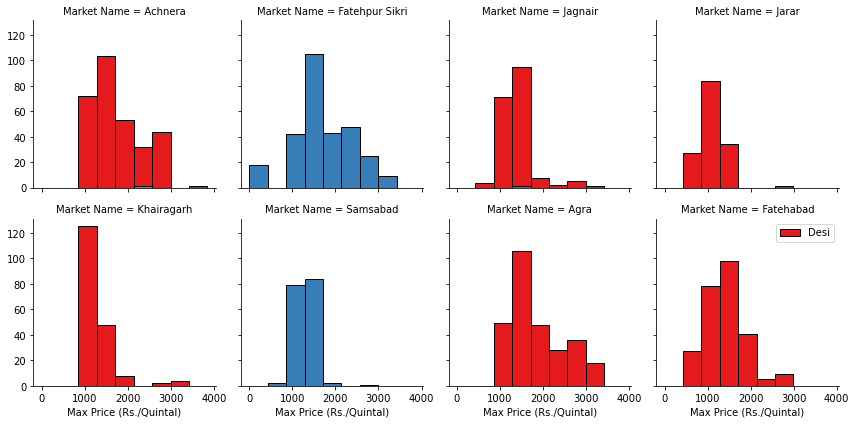

In [17]:
import seaborn as sns

bins = np.linspace(df['Max Price (Rs./Quintal)'].min(), df['Max Price (Rs./Quintal)'].max(), 10)
g = sns.FacetGrid(df, col="Market Name", hue="Variety", palette="Set1", col_wrap=4)
g.map(plt.hist, 'Max Price (Rs./Quintal)', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

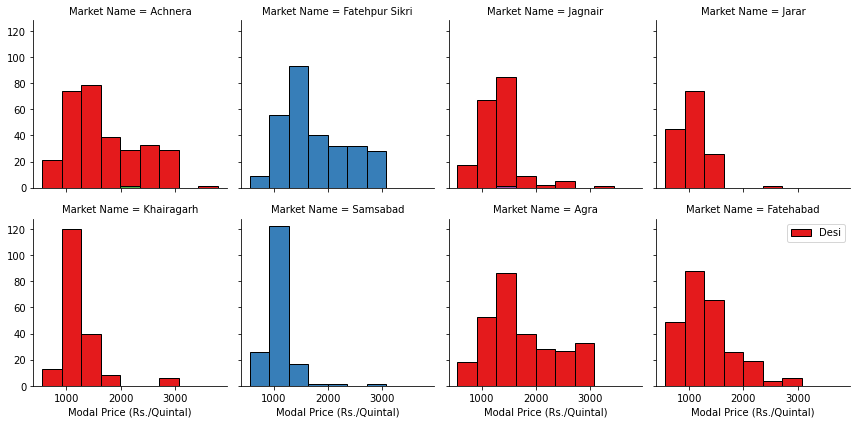

In [18]:
import seaborn as sns

bins = np.linspace(df['Modal Price (Rs./Quintal)'].min(), df['Modal Price (Rs./Quintal)'].max(), 10)
g = sns.FacetGrid(df, col="Market Name", hue="Variety", palette="Set1", col_wrap=4)
g.map(plt.hist, 'Modal Price (Rs./Quintal)', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

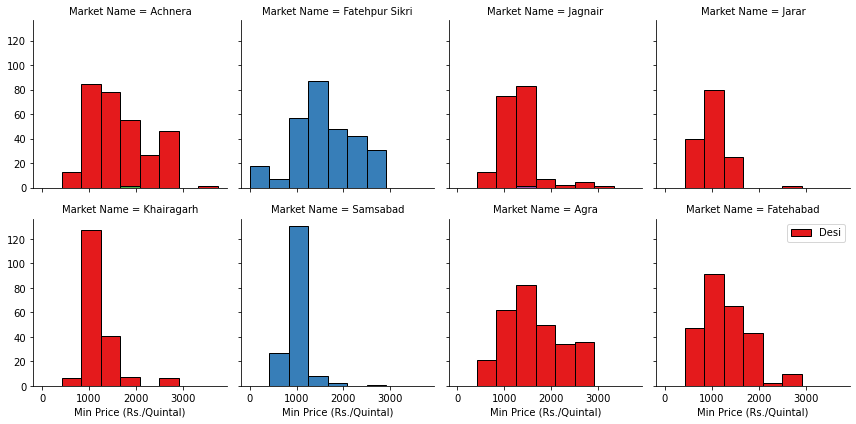

In [19]:
import seaborn as sns

bins = np.linspace(df['Min Price (Rs./Quintal)'].min(), df['Min Price (Rs./Quintal)'].max(), 10)
g = sns.FacetGrid(df, col="Market Name", hue="Variety", palette="Set1", col_wrap=4)
g.map(plt.hist, 'Min Price (Rs./Quintal)', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

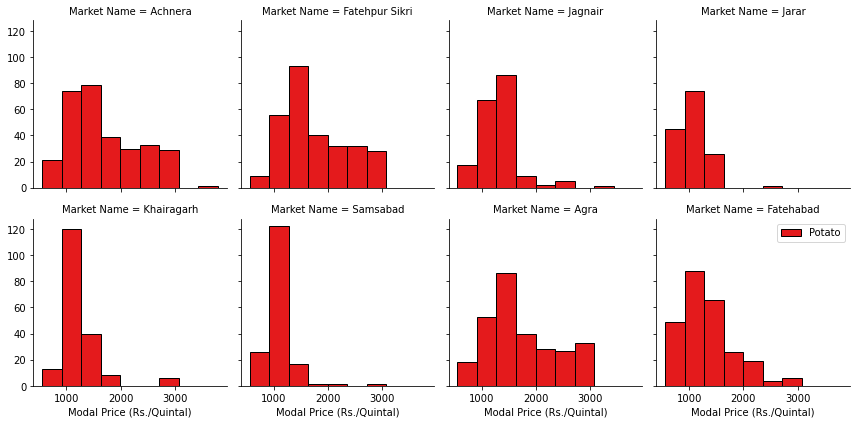

In [20]:
import seaborn as sns

bins = np.linspace(df['Modal Price (Rs./Quintal)'].min(), df['Modal Price (Rs./Quintal)'].max(), 10)
g = sns.FacetGrid(df, col="Market Name", hue="Commodity", palette="Set1", col_wrap=4)
g.map(plt.hist, 'Modal Price (Rs./Quintal)', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [21]:
df_1=df.nlargest(5,['Modal Price (Rs./Quintal)'])
df_1.head()

,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
1664,Agra,Achnera,Potato,Desi,FAQ,3750,3850,3800,29-Nov-20
1651,Agra,Jagnair,Potato,Desi,FAQ,3000,3200,3100,25-Nov-20
1677,Agra,Agra,Potato,Desi,FAQ,2900,3150,3050,02-Dec-20
1682,Agra,Agra,Potato,Desi,FAQ,2900,3100,3000,03-Dec-20
1669,Agra,Fatehpur Sikri,Potato,Local,FAQ,2900,3050,2960,30-Nov-20


Text(0, 0.5, ' Markets')

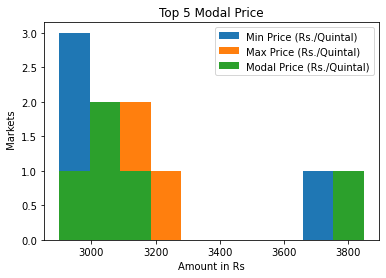

In [22]:
df_1.plot(kind='hist',bins=10)
plt.title('Top 5 Modal Price')
plt.xlabel('Amount in Rs')
plt.ylabel(' Markets')

In [23]:
df_2=df[['Market Name','Commodity','Variety','Min Price (Rs./Quintal)','Max Price (Rs./Quintal)','Modal Price (Rs./Quintal)']]
df_2=pd.concat([df_2,pd.get_dummies(df['Market Name'])], axis=1)
df_2.head()

,Market Name,Commodity,Variety,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Achnera,Agra,Fatehabad,Fatehpur Sikri,Jagnair,Jarar,Khairagarh,Samsabad
0,Achnera,Potato,Desi,1300,1400,1350,1,0,0,0,0,0,0,0
1,Fatehpur Sikri,Potato,Local,1400,1520,1455,0,0,0,1,0,0,0,0
2,Jagnair,Potato,Desi,1250,1350,1300,0,0,0,0,1,0,0,0
3,Jarar,Potato,Desi,1200,1300,1250,0,0,0,0,0,1,0,0
4,Khairagarh,Potato,Desi,1200,1300,1250,0,0,0,0,0,0,1,0


In [25]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [49]:

Feature=df[['Min Price (Rs./Quintal)','Max Price (Rs./Quintal)']]
Feature=pd.concat([Feature,pd.get_dummies(df['Market Name'])], axis=1)
Feature.head()

,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Achnera,Agra,Fatehabad,Fatehpur Sikri,Jagnair,Jarar,Khairagarh,Samsabad
0,1300,1400,1,0,0,0,0,0,0,0
1,1400,1520,0,0,0,1,0,0,0,0
2,1250,1350,0,0,0,0,1,0,0,0
3,1200,1300,0,0,0,0,0,1,0,0
4,1200,1300,0,0,0,0,0,0,1,0


In [50]:
X=Feature.values
X[0:5]

array([[1300, 1400,    1,    0,    0,    0,    0,    0,    0,    0],
       [1400, 1520,    0,    0,    0,    1,    0,    0,    0,    0],
       [1250, 1350,    0,    0,    0,    0,    1,    0,    0,    0],
       [1200, 1300,    0,    0,    0,    0,    0,    1,    0,    0],
       [1200, 1300,    0,    0,    0,    0,    0,    0,    1,    0]],
      dtype=int64)

In [51]:
df['Modal Price (Rs./Quintal)'].replace(to_replace=['Modal Price (Rs./Quintal)','Price'],inplace=True)
y=df['Modal Price (Rs./Quintal)'].values
y

array([1350, 1455, 1300, ..., 1015,  800, 1150])

In [53]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)



In [55]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

In [56]:
yhat = clf.predict(X_test)
yhat [0:5]

array([1200, 1200, 1900, 1200, 1450])

In [64]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.03944944445744611

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
Modal_Price_Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Modal_Price_Tree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [60]:
Modal_Price_Tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [61]:
Modal_Price_Tree = Modal_Price_Tree.predict(X_test)

In [62]:
print (Modal_Price_Tree[0:5])
print (y_test[0:5])


[1350 1150 1900 1220 1450]
[1340 1160 1905 1200 1450]


In [63]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test,Modal_Price_Tree ))

DecisionTrees's Accuracy:  0.3551912568306011


In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [67]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1340, 1150, 1900, 1200, 1450])

In [68]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.7412731006160165
Test set Accuracy:  0.592896174863388


In [71]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.61748634, 0.62295082, 0.60655738, 0.59289617, 0.61748634,
       0.62295082, 0.62021858, 0.62021858, 0.60928962])

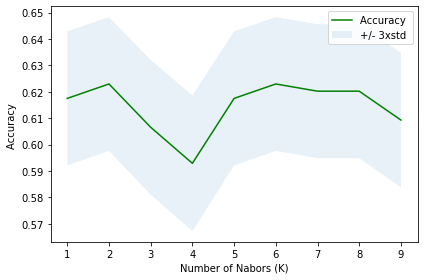

In [72]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [73]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.6229508196721312 with k= 2
